In [18]:
from _utils import *

# Load dataset from file
folder_path = '/mnt/home/tudomlumleart/ceph/10_ToniaDataset/ToniaDataset_withPolys.mat'

dataset = scipy.io.loadmat(folder_path)

# Hox locus dataset
nHox = 72
ctcfNtPolysHox = dataset['ctcfNtPolysHox']
ctcfPolysHox = dataset['ctcfPolysHox']
ntPolysHox = dataset['ntPolysHox']
radNtPolysHox = dataset['radNtPolysHox']
radPolysHox = dataset['radPolysHox']

# Sox locus dataset
nSox = 93
ctcfNtPolysSox = dataset['ctcfNtPolysSox']
ctcfPolysSox = dataset['ctcfPolysSox']
ntPolysSox = dataset['ntPolysSox']
radNtPolysSox = dataset['radNtPolysSox']
radPolysSox = dataset['radPolysSox']

# Interpolate polymers to fill in the NaN values 
ctcfNtPolysHox = interpolate_polymers(ctcfNtPolysHox)
ctcfPolysHox = interpolate_polymers(ctcfPolysHox)
ntPolysHox = interpolate_polymers(ntPolysHox)
radNtPolysHox = interpolate_polymers(radNtPolysHox)
radPolysHox = interpolate_polymers(radPolysHox)

ctcfNtPolysSox = interpolate_polymers(ctcfNtPolysSox)
ctcfPolysSox = interpolate_polymers(ctcfPolysSox)
ntPolysSox = interpolate_polymers(ntPolysSox)
radNtPolysSox = interpolate_polymers(radNtPolysSox)
radPolysSox = interpolate_polymers(radPolysSox)

# Generate distance maps from interpolated polymers
ctcfNtMapsHox = calculate_distance_map(ctcfNtPolysHox)
ctcfMapsHox = calculate_distance_map(ctcfPolysHox)
ntMapsHox = calculate_distance_map(ntPolysHox)
radNtMapsHox = calculate_distance_map(radNtPolysHox)
radMapsHox = calculate_distance_map(radPolysHox)

ctcfNtMapsSox = calculate_distance_map(ctcfNtPolysSox)
ctcfMapsSox = calculate_distance_map(ctcfPolysSox)
ntMapsSox = calculate_distance_map(ntPolysSox)
radNtMapsSox = calculate_distance_map(radNtPolysSox)
radMapsSox = calculate_distance_map(radPolysSox)

# Generate flatten maps from distance maps
ctcfNtFlattenHox = np.array([x.flatten() for x in ctcfNtMapsHox])
ctcfFlattenHox = np.array([x.flatten() for x in ctcfMapsHox])
ntFlattenHox = np.array([x.flatten() for x in ntMapsHox])
radNtFlattenHox = np.array([x.flatten() for x in radNtMapsHox])
radFlattenHox = np.array([x.flatten() for x in radMapsHox])

ctcfNtFlattenSox = np.array([x.flatten() for x in ctcfNtMapsSox])
ctcfFlattenSox = np.array([x.flatten() for x in ctcfMapsSox])
ntFlattenSox = np.array([x.flatten() for x in ntMapsSox])
radNtFlattenSox = np.array([x.flatten() for x in radNtMapsSox])
radFlattenSox = np.array([x.flatten() for x in radMapsSox])

allFlattenHox = np.concatenate((ctcfNtFlattenHox, ctcfFlattenHox, ntFlattenHox, radNtFlattenHox, radFlattenHox), axis=0)


/mnt/sw/nix/store/gpkc8q6zjnp3n3h3w9hbmbj6gjbxs85w-python-3.10.10-view/lib/python3.10/site-packages/scipy/io/matlab/_mio.py:227: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


In [19]:
pca_hox = PCA(n_components=2)
pca_hox.fit(allFlattenHox)
# Fit the PCA model to all Hox datasets
ctcfNtHox = pca_hox.transform(ctcfNtFlattenHox)
ctcfHox = pca_hox.transform(ctcfFlattenHox)
ntHox = pca_hox.transform(ntFlattenHox)
radNtHox = pca_hox.transform(radNtFlattenHox)
radHox = pca_hox.transform(radFlattenHox)

# Convert the principal components to a DataFrame
ctcfNtHox_df = pd.DataFrame(ctcfNtHox, columns=['PC1', 'PC2'])
ctcfNtHox_df['label'] = 'ctcfNtHox'
ctcfHox_df = pd.DataFrame(ctcfHox, columns=['PC1', 'PC2'])
ctcfHox_df['label'] = 'ctcfDegHox'
ntHox_df = pd.DataFrame(ntHox, columns=['PC1', 'PC2'])
ntHox_df['label'] = 'ntHox'
radNtHox_df = pd.DataFrame(radNtHox, columns=['PC1', 'PC2'])
radNtHox_df['label'] = 'radNtHox'
radHox_df = pd.DataFrame(radHox, columns=['PC1', 'PC2'])
radHox_df['label'] = 'radDegHox'

all_df = pd.concat([ntHox_df, radNtHox_df, radHox_df, ctcfNtHox_df, ctcfHox_df], axis=0)

# PCA for Sox locus
allFlattenSox = np.concatenate((ctcfNtFlattenSox, ctcfFlattenSox, ntFlattenSox, radNtFlattenSox, radFlattenSox), axis=0)
pca_sox = PCA(n_components=2)
pca_sox.fit(allFlattenSox)
# Fit the PCA model to all Sox datasets
ctcfNtSox = pca_sox.transform(ctcfNtFlattenSox)
ctcfSox = pca_sox.transform(ctcfFlattenSox)
ntSox = pca_sox.transform(ntFlattenSox)
radNtSox = pca_sox.transform(radNtFlattenSox)
radSox = pca_sox.transform(radFlattenSox)

# Convert the principal components to a DataFrame
ctcfNtSox_df = pd.DataFrame(ctcfNtSox, columns=['PC1', 'PC2'])
ctcfNtSox_df['label'] = 'ctcfNtSox'
ctcfSox_df = pd.DataFrame(ctcfSox, columns=['PC1', 'PC2'])
ctcfSox_df['label'] = 'ctcfDegSox'
ntSox_df = pd.DataFrame(ntSox, columns=['PC1', 'PC2'])
ntSox_df['label'] = 'ntSox'
radNtSox_df = pd.DataFrame(radNtSox, columns=['PC1', 'PC2'])
radNtSox_df['label'] = 'radNtSox'
radSox_df = pd.DataFrame(radSox, columns=['PC1', 'PC2'])
radSox_df['label'] = 'radDegSox'

all_df_sox = pd.concat([ntSox_df, radNtSox_df, radSox_df, ctcfNtSox_df, ctcfSox_df], axis=0)

# Find the lower and upper bounds of the PC1 and PC2 for Hox locus
min_pc1_hox = min(all_df['PC1'])
max_pc1_hox = max(all_df['PC1'])
min_pc2_hox = min(all_df['PC2'])
max_pc2_hox = max(all_df['PC2'])

# Find the lower and upper bounds of the PC1 and PC2 for Sox locus
min_pc1_sox = min(all_df_sox['PC1'])
max_pc1_sox = max(all_df_sox['PC1'])
min_pc2_sox = min(all_df_sox['PC2'])
max_pc2_sox = max(all_df_sox['PC2'])

# Create a grid of points for Hox locus
num_microstates = 75 # Number of microstates to generate
pc1_hox = np.linspace(min_pc1_hox, max_pc1_hox, num_microstates)
pc2_hox = np.linspace(min_pc2_hox, max_pc2_hox, num_microstates)
pc1_hox, pc2_hox = np.meshgrid(pc1_hox, pc2_hox)
pc1_hox = pc1_hox.flatten()
pc2_hox = pc2_hox.flatten()

# Put the grid points into a DataFrame
grid_hox = pd.DataFrame({'PC1': pc1_hox, 'PC2': pc2_hox})
# Sort PC2 in descending order while keeping PC1 in ascending order
grid_hox = grid_hox.sort_values(by=['PC1', 'PC2'], ascending=[True, False], ignore_index=True)

# Infer microstates from PCA for Hox locus
microstates_hox = pca_hox.inverse_transform(grid_hox)

# Use the function I just wrote to generate microstates for the Sox locus
microstates_sox = generate_microstates(min_pc1_sox, max_pc1_sox, min_pc2_sox, max_pc2_sox, num_microstates, pca_sox)

In [20]:
distance_observations_microstates_hox = scipy.spatial.distance.cdist(allFlattenHox, microstates_hox, 'euclidean')
distance_observations_microstates_sox = scipy.spatial.distance.cdist(allFlattenSox, microstates_sox, 'euclidean')

In [21]:
microstates_hox_assignment = np.argmin(distance_observations_microstates_hox, axis=0)
microstates_sox_assignment = np.argmin(distance_observations_microstates_sox, axis=0)

In [22]:
distance_observations_microstates_hox = np.min(distance_observations_microstates_hox, axis=0)
distance_observations_microstates_sox = np.min(distance_observations_microstates_sox, axis=0)

In [23]:
microstates_hox_sc = allFlattenHox[microstates_hox_assignment, :]
microstates_sox_sc = allFlattenSox[microstates_sox_assignment, :]

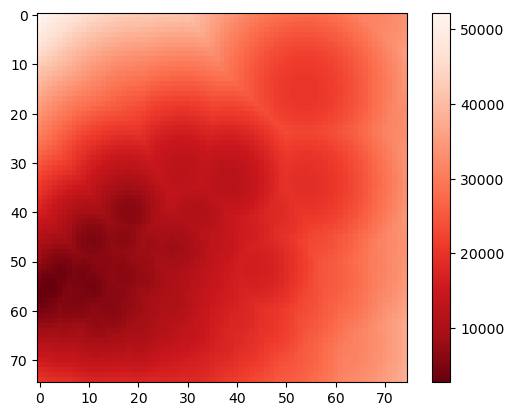

In [24]:
plt.imshow(distance_observations_microstates_hox.reshape(num_microstates, num_microstates).T, cmap='Reds_r')
plt.colorbar()

In [25]:
# Lets just try reweighting 